### **STEPS TO IMPLEMENT SIMPLE LINEAR REGRESSION**
* **STEP 1 : LOAD THE DATASET USING PANDAS.**
* **STEP 2 : EDA AND FEATURE ENGINEERING.**
* **STEP 3 : IDENTIFY YOUR DEPENDENT AND INDEPENDENT FEATURES.**
* **STEP 4 : IDENTIFY THE RELATIONSHIP BETWEEN YOUR DEPENDENT AND INDEPENDENT FEATURES USING SCATTER PLOT.**
    * **STEP 4A : WE CAN USE CORR TO FIND CORRELATION X AND Y(+VE CORRELATION OR -VE CORRELATION).**
    * **STEP 4B : WE CAN ALSO USE SEABORN'S PAIRPLOT TO FIND CORRELATION BETWEEN MULTIPLE INDEPENDENT FEATURES.**
* **STEP 5 : WE HAVE TO DO TRAIN TEST SPLIT.**
* **STEP 6 : WE HAVE TO DO STANDARDIZATION.**
    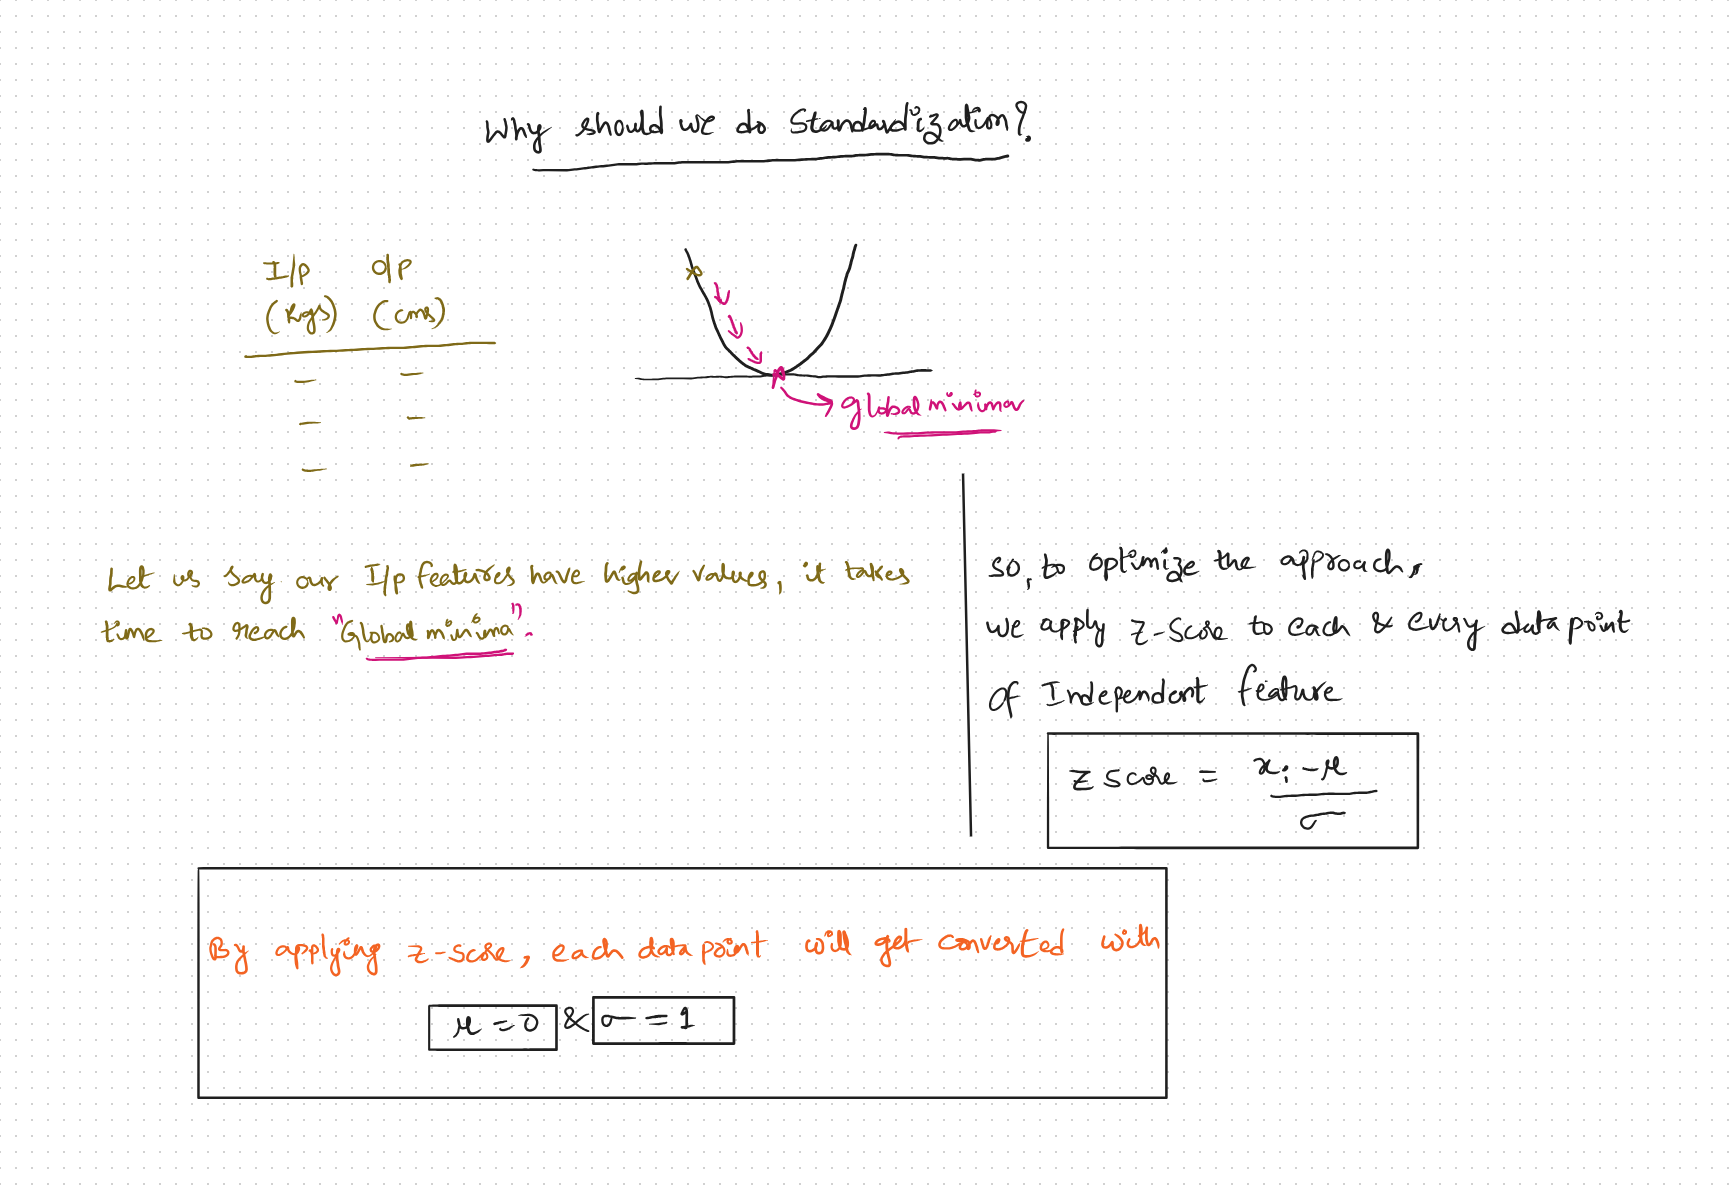
* **STEP 7 : APPLY MACHINE LEARNING ALGORITHM I.E., LINEAR REGRESSION.**
* **STEP 8 : PREDICTION OF TEST DATA.**
* **STEP 9 : MEASURE PERFORMANCE.**


###### **NOTE:**
###### **ALWAYS INDEPENDENT FEATURES WILL BE EITHER 2 DIMENSIONAL ARRAY/ DATAFRAME.**
###### **LIKEWISE DEPENDENT FEATURES CAN BE EITHER 1 DIMENSIONAL ARRAY/ SERIES.**


#### This is example for Simple Linear Regression, because we have one input feature and one dependent feature.

 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

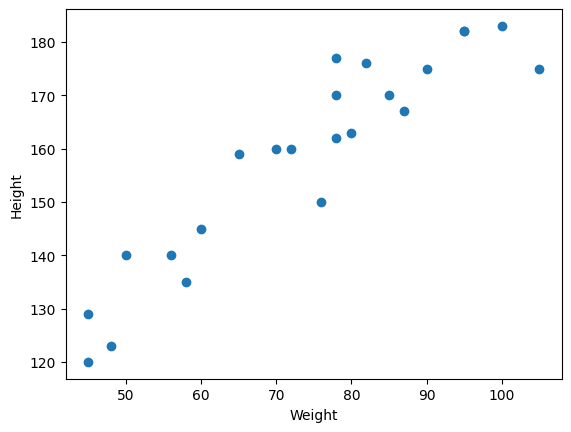

In [3]:
## Scatter plot -  To find the scattering of Y w.r.t X, we use Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
## With Weight, Height also increasing. This is +ve Correlation. Let us see, correlation.

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


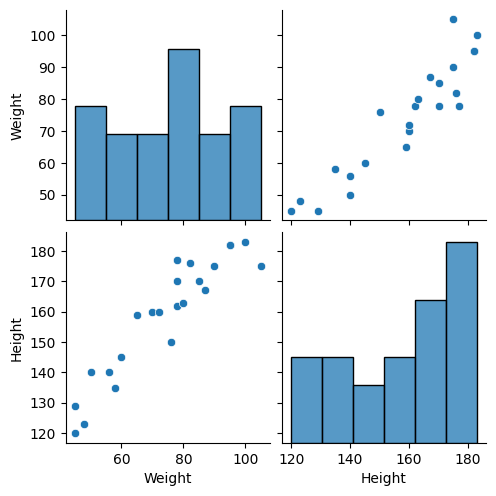

In [5]:
import seaborn as sns

sns.pairplot(df)

#### In this case, we have a strong feeling that linear regression would work. But usually when we do Multiple Linear Regression, we also check the relationship between the Independent features.

#### Multicollinearity is a scenario wherein if we have 2 or 3 independent features and the correlation between those independent feature are high, then we can neglect those features which are highly correlated. We can consider either of those features.

### STEP 1 : DIVIDE FEATURES INTO INDEPENDENT AND DEPENDENT

In [6]:
X_series = df['Weight']
print(X_series)
print(f'type(X_series) is {type(X_series)}')
print(f'type(df) is {type(df)}')

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64
type(X_series) is <class 'pandas.core.series.Series'>
type(df) is <class 'pandas.core.frame.DataFrame'>


#### X = df['Weight'] => X is just a Series of records.
#### Important thing is that always our Independent Feature should be either as a DataFrame / 2-dimensional array

In [14]:
X = df[['Weight']]
print(X)
print(type(X))
print(np.array(X).shape)

Y = df['Height']

# X = df['Weight']
# print(np.array(X).shape)

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72
<class 'pandas.core.frame.DataFrame'>
(23, 1)


In [8]:
df[['Height']]

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [16]:
## TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
## STANDARDIZATION
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [19]:
## For testing data, we need to use scalar.transform() not scalar.fit_transform. 
## This is because, transform will take previous mean and standard deviation. 
## It doesn't calculate for TEST DATASET seperately.
## This is to avoid "Data Leakage". We don't want our model to not know about test data.
x_test = scalar.transform(x_test)

In [20]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)

## This gives us an error because of 1d array
# regression.fit(X_series)





TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

In [21]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
## Let us print coeff/ slope and intercept

print(f"regression.coef_ is {regression.coef_}")

print(f"regression.intercept_ is {regression.intercept_}")



regression.coef_ is [17.2982057]
regression.intercept_ is 156.47058823529412


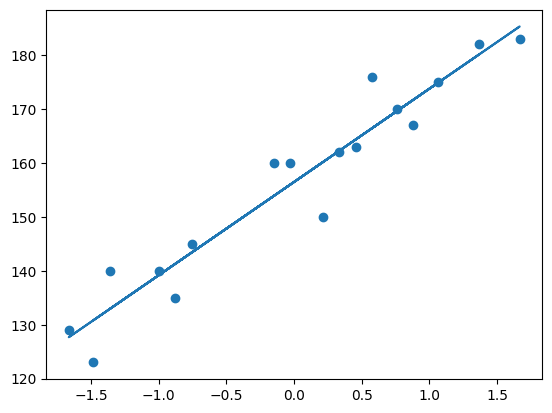

In [23]:
## Plot training data plot "Best Fit Line"

plt.scatter(x_train, y_train)
plt.plot(x_train,regression.predict(x_train))

### **Prediction of test data**
### **Predicted Height Output = Intercept + Coef_(Weights)**
### **y_pred_test = 156.470 + 17.29 * x_test**

In [25]:
## Prediction of test data
# y_pred = regression.intercept_ + regression.coef_ * (x_test)

y_pred = regression.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [26]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {rmse}")

Mean Absolute Error : 9.66512588679501
Mean Squared Error : 114.84069295228699
Root Mean Squared Error : 10.716374991212605


## **R^2 = (1 - (SSR/SST))**
* **R^2 : Coefficient of determincation**
* **SSR : Sum of squares of residuals**
* **SST : Total sum of squares**

In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


## **ADJUSTED R^2 = (1 - [(1-R^2)*(n-1)/(n-k-1)])**
* **R^2 : R2 of the model**
* **n : The number of observations**
* **k : The number of predicator variables**

In [33]:
adjusted_r_square=1-((1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print(adjusted_r_square)

0.6701033397476595


In [36]:
### OLS LINEAR REGRESSION
import statsmodels.api as sm

model = sm.OLS(y_train,x_train).fit()
## endog - 1d endogenous response variable - dependent variable
## exog - True Input variable.

prediction = model.predict(x_test)

print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                       0.664
Time:                        02:04:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
### Prediction for new data

regression.predict([[72]])

array([1401.94139895])

In [39]:
### 1401.94 is a big value. This happened because, the input 72 has to be standardized
regression.predict(scalar.transform([[72]]))

c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])